In [1]:
!pip3 install wordcloud

     -------------------------------------- 153.1/153.1 kB 4.6 MB/s eta 0:00:00


In [2]:
from wordcloud import WordCloud

In [4]:
import pandas as pd

In [5]:
url='https://drive.google.com/file/d/1si7B_mq8EnoUNFjBEovILwPfzYW8Gjn8/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
trainingDf = pd.read_csv(url)

In [9]:
trainingDf.head()

,score,text
0,3.0,good and helpfull read this book is very good ...
1,1.0,Sadly overpriced and irrelevant In spite of it...
2,2.0,Endless rant Howard should have borrowed from ...
3,1.0,Not Quite Hip It's really a shame about the ti...
4,5.0,Journey to the Centre of the Earth Hey! This i...


In [25]:
def get_wordnet_pos(pos_tag):

    if pos_tag.startswith('J'):
        return wordnet.ADJ 

    elif pos_tag.startswith('V'):
        return wordnet.VERB 

    elif pos_tag.startswith('N'):
        return wordnet.NOUN

    elif pos_tag.startswith('R'):
        return wordnet.ADV
    
    else:
        return wordnet.NOUN # default, return wordnet tag "NOUN"

#Create a function to lemmatize tokens in the reviews
def lemmatized_tokens(text):
        text = text.lower()
        pattern = r'\b[a-zA-Z]{3,}\b'                 
        tokens = nltk.regexp_tokenize(text, pattern) # tokenize the text
        tagged_tokens = nltk.pos_tag(tokens)  # a list of tuples (word, pos_tag)
          
        stop_words = stopwords.words('english')
        new_stopwords = ["book","read","quot","story"]  #customize extra stop_words
        stop_words.extend(new_stopwords)
        stop_words = set(stop_words)
        
        wordnet_lemmatizer = WordNetLemmatizer()
        # get lemmatized tokens                             #call function "get_wordnet_pos"
        lemmatized_words=[wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(tag)) 
                  # tagged_tokens is a list of tuples (word, tag)
                  for (word, tag) in tagged_tokens \
                  # remove stop words
                  if word not in stop_words and \
                  # remove punctuations
                  word not in string.punctuation]

        return lemmatized_words

In [26]:
#Create a function to generate wordcloud
def wordcloud(review_df, review_colname, color, title):
    '''    
    INPUTS:
        reivew_df - dataframe, positive or negative reviews
        review_colname - column name, positive or negative review
        color - background color of worldcloud
        title - title of the wordcloud
    OUTPUT:
    Wordcloud visuazliation
    '''  
    text = review_df[review_colname].tolist()
    text_str = ' '.join(lemmatized_tokens(' '.join(text))) #call function "lemmatized_tokens"
    wordcloud = WordCloud(collocations = False,
                          background_color = color,
                          width=1600, 
                          height=800, 
                          margin=2,
                          min_font_size=20).generate(text_str)

    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.figtext(.5,.8,title,fontsize = 20, ha='center')
    plt.show()     

In [11]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords,wordnet 

In [13]:
import string

In [15]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import re

from bs4 import BeautifulSoup as bs
import requests

In [16]:
import numpy as np

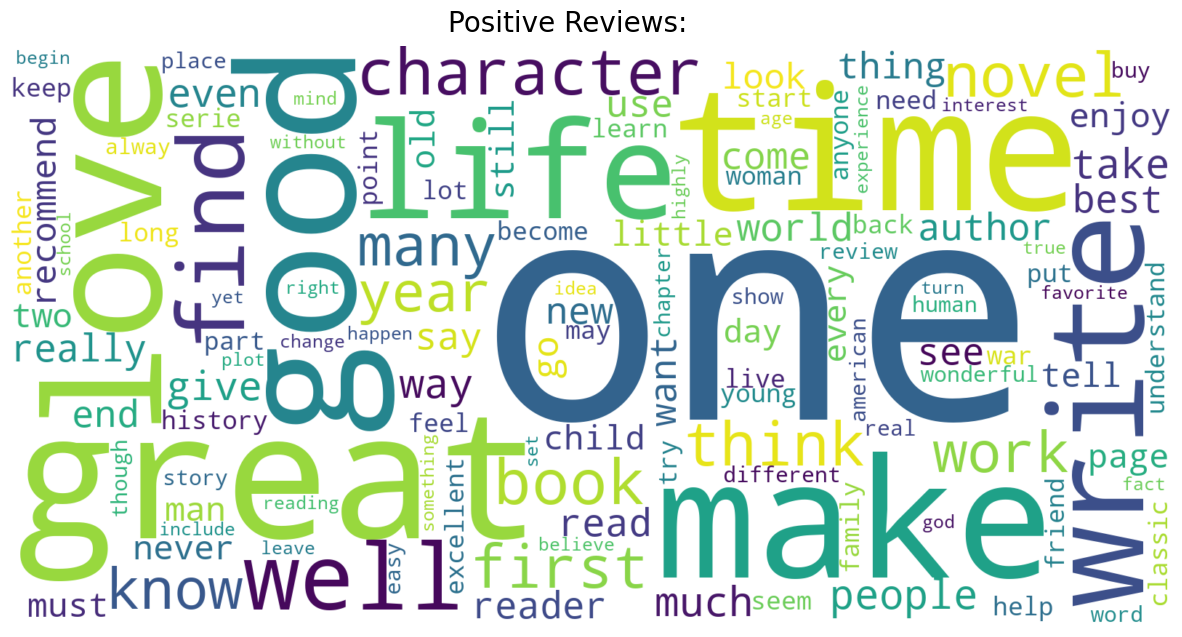

In [27]:
wordcloud(trainingDf[trainingDf.score >3],'text', 'white','Positive Reviews: ')

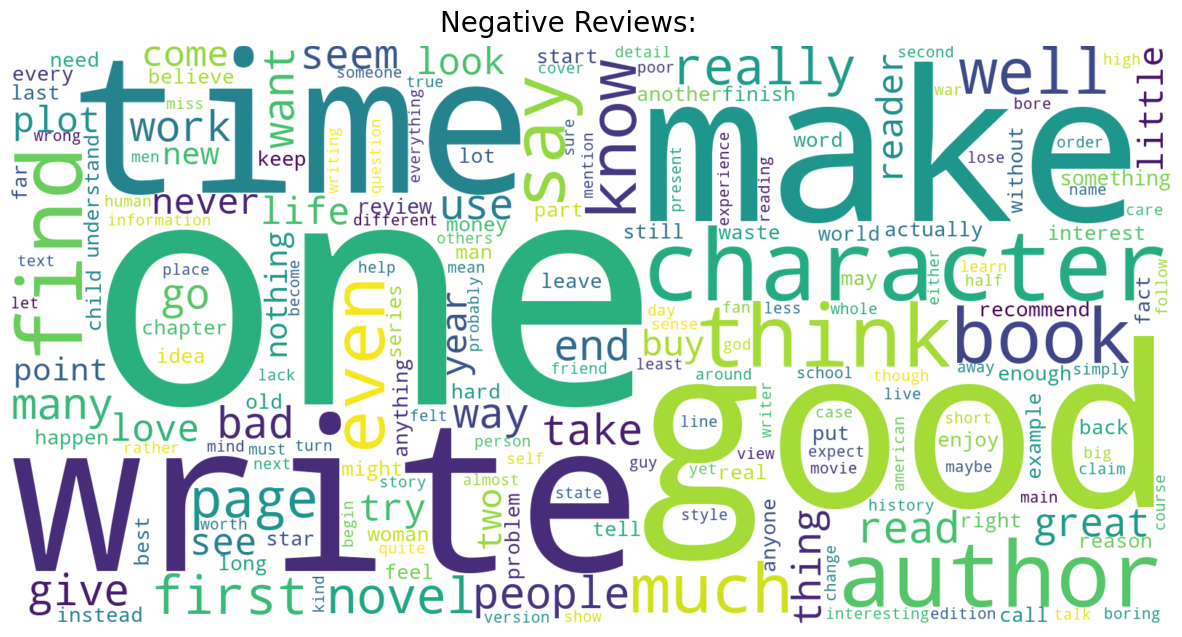

In [28]:
wordcloud(trainingDf[trainingDf.score <3],'text', 'white','Negative Reviews: ')

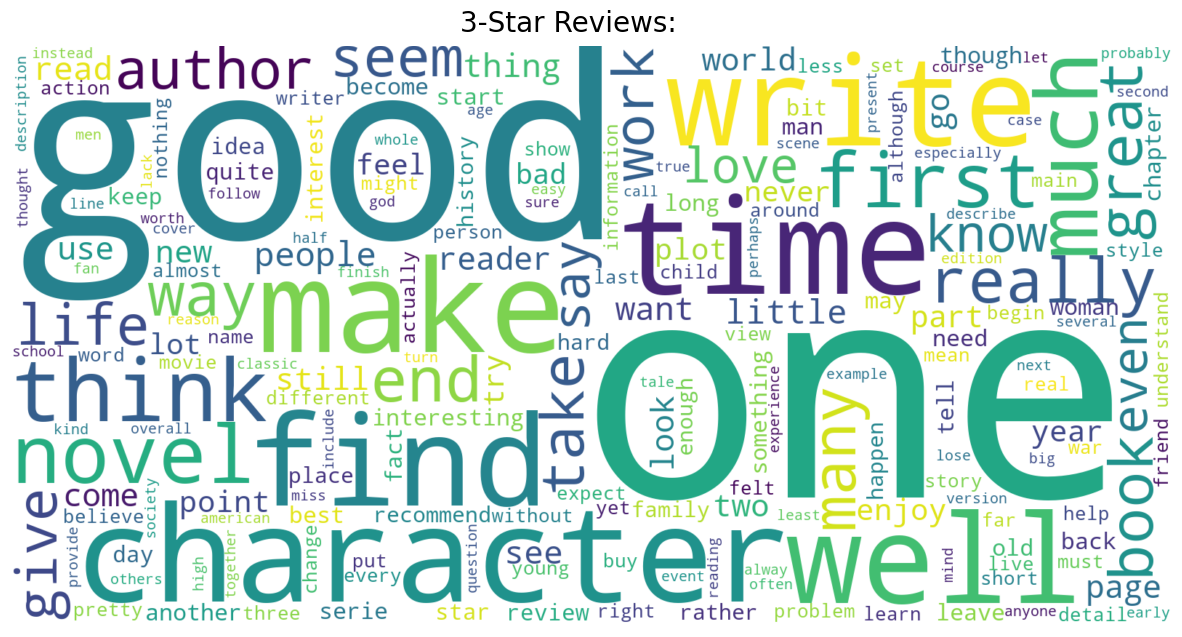

In [29]:
wordcloud(trainingDf[trainingDf.score ==3],'text', 'white','3-Star Reviews: ')